In [1]:
!gdown 16asyYugSWOYljxZrbXvWvHZ3sFN3rewn

Downloading...
From (original): https://drive.google.com/uc?id=16asyYugSWOYljxZrbXvWvHZ3sFN3rewn
From (redirected): https://drive.google.com/uc?id=16asyYugSWOYljxZrbXvWvHZ3sFN3rewn&confirm=t&uuid=80221341-3a7d-489c-bdc1-aa74bd7aca7b
To: d:\Data Augmentation\src\helpers.py

  0%|          | 0.00/2.40k [00:00<?, ?B/s]
100%|██████████| 2.40k/2.40k [00:00<?, ?B/s]


In [2]:
!gdown 1TB828tBcEIxhkjh3RnE8hPUc3R2GE8OT

Downloading...
From: https://drive.google.com/uc?id=1TB828tBcEIxhkjh3RnE8hPUc3R2GE8OT
To: d:\Data Augmentation\src\image.png

  0%|          | 0.00/386k [00:00<?, ?B/s]
100%|██████████| 386k/386k [00:00<00:00, 1.02MB/s]
100%|██████████| 386k/386k [00:00<00:00, 1.02MB/s]


In [20]:
from pathlib import Path
import torch
import matplotlib.pyplot as plt

from torchvision.transforms import v2
from torchvision.io import read_file, decode_image

torch.manual_seed(1)

from helpers import plot
img_bytes = read_file("image.png") 
orig_img = decode_image(img_bytes)
print(f"{type(orig_img) = }, {orig_img.dtype = }, {orig_img.shape = }")

type(orig_img) = <class 'torch.Tensor'>, orig_img.dtype = torch.uint8, orig_img.shape = torch.Size([3, 512, 512])


### Rotation

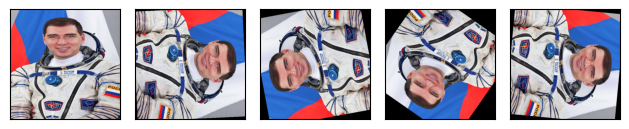

In [7]:
rotater = v2.RandomRotation(degrees=(0, 360))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot([orig_img] + rotated_imgs)

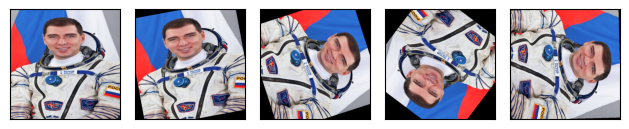

In [8]:
rotater = v2.RandomRotation(degrees=(0, 360))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot([orig_img] + rotated_imgs)

### Translation

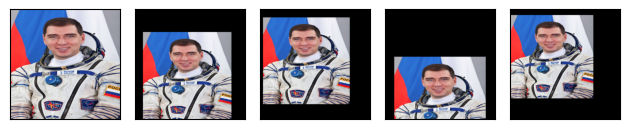

In [9]:
affine_transformer = v2.RandomAffine(degrees=(0, 0), translate=(0.2, 0.4), scale=(0.7, 0.9))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

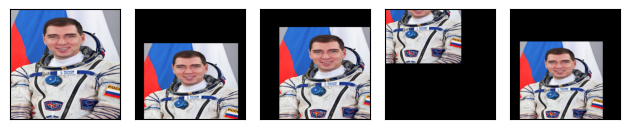

In [10]:
affine_transformer = v2.RandomAffine(degrees=(0, 0), translate=(0.2, 0.4), scale=(0.7, 0.9))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

### Shearing

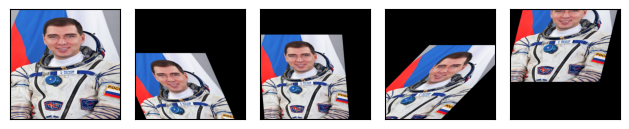

In [11]:
affine_transformer = v2.RandomAffine(degrees=(0, 0), translate=(0.2, 0.4), scale=(0.7, 0.9), shear=(-45, 45))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

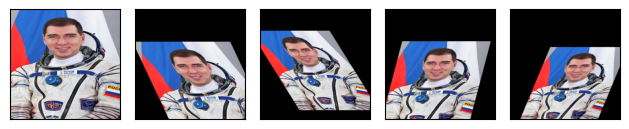

In [12]:
affine_transformer = v2.RandomAffine(degrees=(0, 0), translate=(0.2, 0.4), scale=(0.7, 0.9), shear=(-45, 45))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

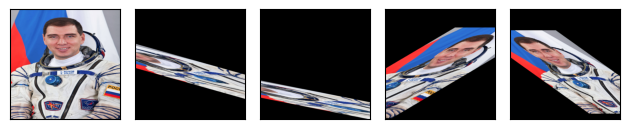

In [13]:
affine_transformer = v2.RandomAffine(degrees=(0, 0), translate=(0.2, 0.4), scale=(0.7, 0.9), shear=(-180, 180))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

### Flip

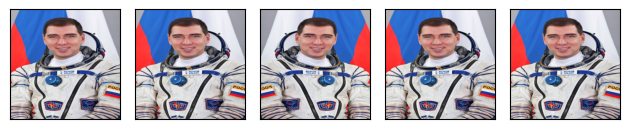

In [14]:
hflipper = v2.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot([orig_img] + transformed_imgs)

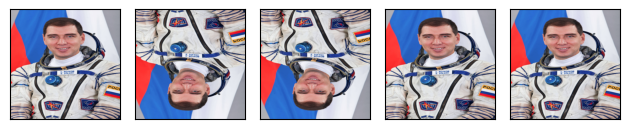

In [15]:
vflipper = v2.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot([orig_img] + transformed_imgs)

### Cropping and resizing

torch.Size([3, 512, 512])


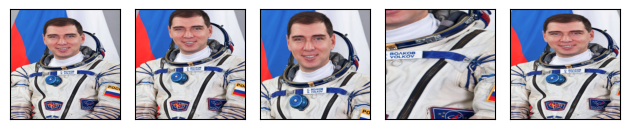

In [16]:
resize_cropper = v2.RandomResizedCrop(size=(512, 512))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot([orig_img] + resized_crops)
print(resized_crops[0].shape)

torch.Size([3, 512, 512])


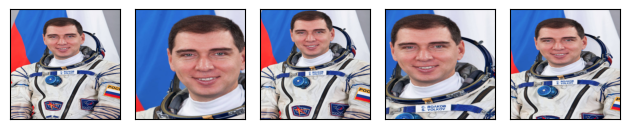

In [17]:
resize_cropper = v2.RandomResizedCrop(size=(512, 512))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot([orig_img] + resized_crops)
print(resized_crops[0].shape)

### Noise Injection

In [22]:
import torch 
from torchvision import transforms 

class GaussianNoise(object):
    def __init__(self, mean=0.0, sigma=0.1):
        self.mean = mean 
        self.sigma = sigma 

    def __call__(self, tensor):
        noise = torch.randn_like(tensor) * self.sigma + self.mean 
        return torch.clamp(tensor + noise, 0.0, 1.0)

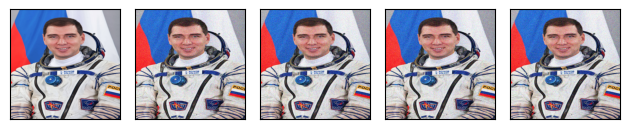

In [23]:
noise_transform = GaussianNoise(mean=0.0, sigma=0.1)
noisy_images = [noise_transform(orig_img.float()/255) for _ in range(4)]
plot([orig_img] + noisy_images)

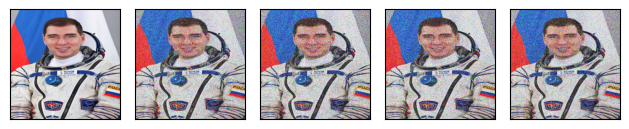

In [25]:
noise_transform = GaussianNoise(mean=0.0, sigma=0.3)
noisy_images = [noise_transform(orig_img.float()/255) for _ in range(4)]
plot([orig_img] + noisy_images)

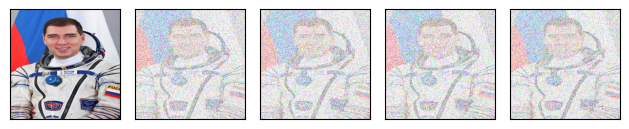

In [26]:
noise_transform = GaussianNoise(mean=1.0, sigma=1)
noisy_images = [noise_transform(orig_img.float()/255) for _ in range(4)]
plot([orig_img] + noisy_images)

### Color Space

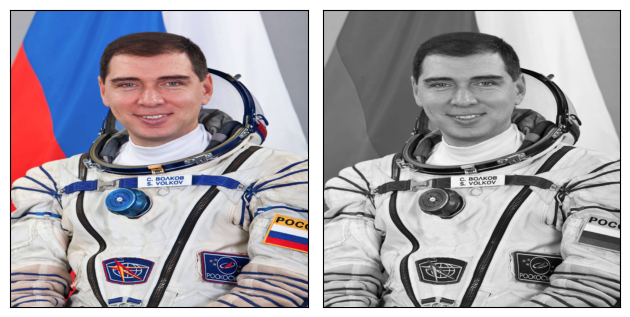

In [27]:
gray_img = v2.Grayscale()(orig_img)
plot([orig_img, gray_img], cmap='gray')

### Color Jitter

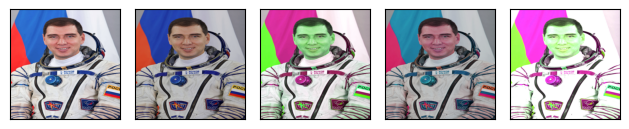

In [28]:
jitter = v2.ColorJitter(brightness=.5, hue=.3)
jittered_imgs = [jitter(orig_img) for _ in range(4)]
plot([orig_img] + jittered_imgs)

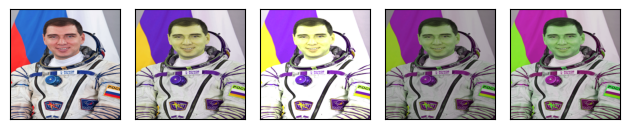

In [29]:
jitter = v2.ColorJitter(brightness=.5, hue=.3)
jittered_imgs = [jitter(orig_img) for _ in range(4)]
plot([orig_img] + jittered_imgs)

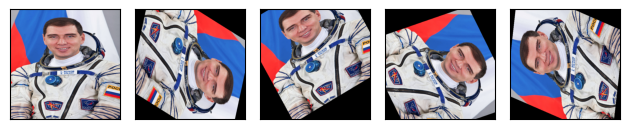

In [30]:
affine_transformer = v2.RandomAffine(degrees=(0, 360), translate=(0.0, 0.2), shear=(-45, 45))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)